In [ ]:
pip install researchpy

# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from imblearn.combine import SMOTETomek
from collections import Counter
import researchpy as rp
from imblearn.over_sampling import ADASYN

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Uploading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving unbalanced-3-F-overlaple.csv to unbalanced-3-F-overlaple.csv


# Reading the dataset

In [ ]:
df=pd.read_csv('unbalanced-3-F-overlaple.csv')
df.head()

,X1,X2,X3,X4,Y
0,0.582442,1.617866,1.580509,0.475332,0
1,0.529984,1.680974,1.552265,0.515669,0
2,0.497454,1.557466,1.295593,0.414680,0
3,0.378579,1.679751,1.939653,0.489651,0
4,0.662562,1.438194,1.160705,0.342215,0


# Exploring the data

In [ ]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'Y'], dtype='object')

In [ ]:
df.shape

(300, 5)

In [ ]:
df.describe()

,X1,X2,X3,X4,Y
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.386386,1.603704,1.607220,1.341763,0.800000
std,0.170331,0.233173,0.144240,0.534144,0.400668
min,-0.249143,0.887238,1.013464,-0.009332,0.000000
25%,0.284695,1.434041,1.524660,1.125096,1.000000
50%,0.386325,1.619356,1.603566,1.494484,1.000000
75%,0.488382,1.771158,1.689778,1.722224,1.000000
max,0.936800,2.237442,2.155714,2.374510,1.000000


In [ ]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
Y     0
dtype: int64

# Statistical and Consistency Analysis

In [ ]:
df['Y'].value_counts()

1    240
0     60
Name: Y, dtype: int64

In [ ]:
df_0 = df[df["Y"] == 0]
df_0.head()

,X1,X2,X3,X4,Y
0,0.582442,1.617866,1.580509,0.475332,0
1,0.529984,1.680974,1.552265,0.515669,0
2,0.497454,1.557466,1.295593,0.414680,0
3,0.378579,1.679751,1.939653,0.489651,0
4,0.662562,1.438194,1.160705,0.342215,0


In [ ]:
rp.summary_cont(df_0)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,X1,60.0,0.3971,0.2461,0.0318,0.3335,0.4606
1,X2,60.0,1.6285,0.1972,0.0255,1.5776,1.6795
2,X3,60.0,1.6254,0.2424,0.0313,1.5628,1.6880
3,X4,60.0,0.4162,0.1744,0.0225,0.3711,0.4612
4,Y,60.0,0.0000,0.0000,0.0000,NaN,NaN


In [ ]:
np.var(df_0)

X1    0.059562
X2    0.038238
X3    0.057793
X4    0.029903
Y     0.000000
dtype: float64

In [ ]:
scipy.stats.skew(df_0)

array([-0.23521748,  0.40586394, -0.23025613,  0.03776079,  0.        ])

In [ ]:
df_1 = df[df["Y"] == 1]
df_1.head()

,X1,X2,X3,X4,Y
60,0.368106,1.350381,1.662264,1.440502,1
61,0.137067,1.650411,1.617613,1.165631,1
62,0.371509,1.518269,1.656508,1.559128,1
63,0.537733,2.063977,1.428437,1.873213,1
64,0.458800,1.802085,1.536585,1.869517,1


In [ ]:
rp.summary_cont(df_1)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,X1,240.0,0.3837,0.1460,0.0094,0.3652,0.4023
1,X2,240.0,1.5975,0.2413,0.0156,1.5668,1.6282
2,X3,240.0,1.6027,0.1068,0.0069,1.5891,1.6163
3,X4,240.0,1.5732,0.2839,0.0183,1.5371,1.6093
4,Y,240.0,1.0000,0.0000,0.0000,NaN,NaN


In [ ]:
np.var(df_1)

X1    0.021219
X2    0.057984
X3    0.011368
X4    0.080248
Y     0.000000
dtype: float64

In [ ]:
scipy.stats.skew(df_1)

array([-0.16574387, -0.41893022,  0.18276519, -0.2154754 ,  0.        ])

# A significant difference is present between the number of instances for classes 0 and 1. Hence, it can be attributed as an imbalanced dataset.

# Plotting of data points for all the 6 combinations of the different features, in order to visualise overlapping.

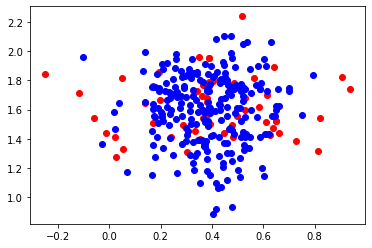

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x1,x2,color='red')
  else:
    plt.scatter(x1,x2,color='blue')
plt.show()

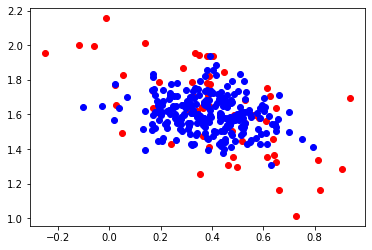

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x1,x3,color='red')
  else:
    plt.scatter(x1,x3,color='blue')
plt.show()

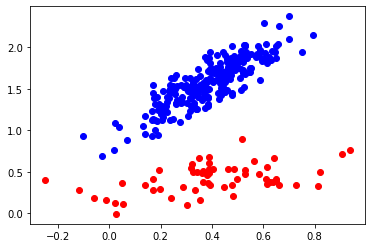

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x1,x4,color='red')
  else:
    plt.scatter(x1,x4,color='blue')
plt.show()

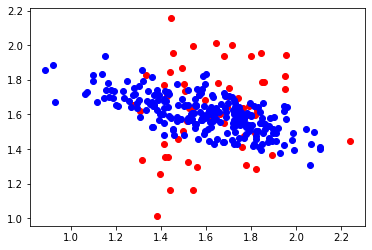

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x2,x3,color='red')
  else:
    plt.scatter(x2,x3,color='blue')
plt.show()

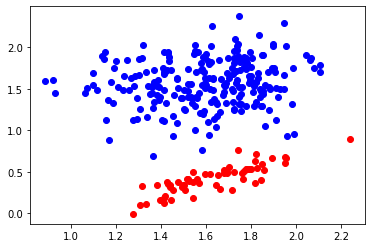

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x2,x4,color='red')
  else:
    plt.scatter(x2,x4,color='blue')
plt.show()

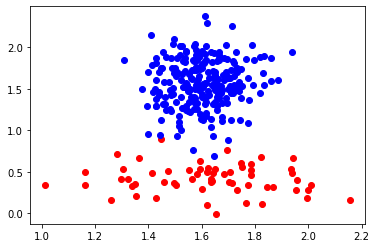

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x3,x4,color='red')
  else:
    plt.scatter(x3,x4,color='blue')
plt.show()

# Hence, it can be confirmed from the above scatter plots that x1 overlaps with x2, x1 overlaps with x3, and x2 overlaps with x3.

# Data Splicing

In [ ]:
x=df.drop('Y',axis=1)
y=df['Y']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

# Decision Tree Clasiifier

In [ ]:
tree = DecisionTreeClassifier()
tree_fit = tree.fit(x_train,y_train)
y_pred = tree_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(tree, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(tree, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(tree, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.987

Confusion Matrix : 
 [[13  1]
 [ 0 61]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.98      1.00      0.99        61

    accuracy                           0.99        75
   macro avg       0.99      0.96      0.98        75
weighted avg       0.99      0.99      0.99        75


Accuracy using 10 fold Cross validation =  0.9818181818181818

Precision using 10 fold Cross validation =  0.9894736842105264

Recall using 10 fold Cross validation =  0.9888888888888889


# KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn_fit = knn.fit(x_train,y_train)
y_pred = knn_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(knn, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(knn, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 1.000

Confusion Matrix : 
 [[14  0]
 [ 0 61]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        61

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


Accuracy using 10 fold Cross validation =  1.0

Precision using 10 fold Cross validation =  1.0

Recall using 10 fold Cross validation =  1.0


# SVM Classifier

In [ ]:
mod = SVC()
mod_fit = mod.fit(x_train,y_train)
y_pred = mod_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(mod, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(mod, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(mod, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 1.000

Confusion Matrix : 
 [[14  0]
 [ 0 61]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        61

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


Accuracy using 10 fold Cross validation =  1.0

Precision using 10 fold Cross validation =  1.0

Recall using 10 fold Cross validation =  1.0


# Resampling using SMOTETomek

In [ ]:
os=SMOTETomek(0.75, random_state=1)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The classes before fitCounter({1: 179, 0: 46})
The number of classes after fitCounter({1: 179, 0: 134})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
#os=SMOTETomek(random_state=1)
#x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 179, 0: 46})
The number of classes after fit Counter({1: 179, 0: 134})


In [ ]:
x_train_ns.size

1252

In [ ]:
y_train_ns.size

313

# Decision Tree after resampling

In [ ]:
tree = DecisionTreeClassifier()
tree_fit = tree.fit(x_train_ns,y_train_ns)
y_pred = tree_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(tree, x_train_ns, y_train_ns, cv=10, scoring='accuracy')
v_pre = cross_val_score(tree, x_train_ns, y_train_ns, cv=10, scoring='precision')
v_rec = cross_val_score(tree, x_train_ns, y_train_ns, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 1.000

Confusion Matrix : 
 [[14  0]
 [ 0 61]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        61

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


Accuracy using 10 fold Cross validation =  0.9872983870967742

Precision using 10 fold Cross validation =  0.9947368421052631

Recall using 10 fold Cross validation =  0.9888888888888889


# KNN after resampling

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn_fit = knn.fit(x_train_ns,y_train_ns)
y_pred = knn_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(knn, x_train_ns, y_train_ns, cv=10, scoring='accuracy')
v_pre = cross_val_score(knn, x_train_ns, y_train_ns, cv=10, scoring='precision')
v_rec = cross_val_score(knn, x_train_ns, y_train_ns, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 1.000

Confusion Matrix : 
 [[14  0]
 [ 0 61]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        61

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


Accuracy using 10 fold Cross validation =  1.0

Precision using 10 fold Cross validation =  1.0

Recall using 10 fold Cross validation =  1.0


# SVM after resampling

In [ ]:
mod = SVC()
mod_fit = mod.fit(x_train_ns,y_train_ns)
y_pred = mod_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(mod, x_train_ns, y_train_ns, cv=10, scoring='accuracy')
v_pre = cross_val_score(mod, x_train_ns, y_train_ns, cv=10, scoring='precision')
v_rec = cross_val_score(mod, x_train_ns, y_train_ns, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 1.000

Confusion Matrix : 
 [[14  0]
 [ 0 61]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        61

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


Accuracy using 10 fold Cross validation =  1.0

Precision using 10 fold Cross validation =  1.0

Recall using 10 fold Cross validation =  1.0
